[[[70.5 66.5 17.4]
  [29.5 51.5 14.9]
  [71.5 28.5  8.8]]]


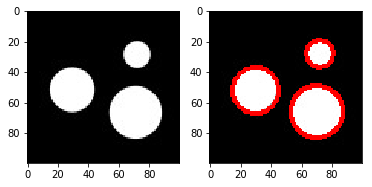

In [65]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt


imgfile = 'images/multiple.jpg'

image = cv2.imread(imgfile)
output = image.copy()
imgBlur = cv2.medianBlur(image, 5)
gray = cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)

# print(image)
# imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5, param1 = 50, param2 = 30)

print(circles)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv2.circle(output, (x,y), r, (255, 0,0), 2)
        # cv2.rectangle(output, ?)


fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(output)

plt.show()

# plt.imshow

# cv2.imshow("output", np.hstack([image, output]))
# cv2.waitKey(0)

(100, 100, 141)


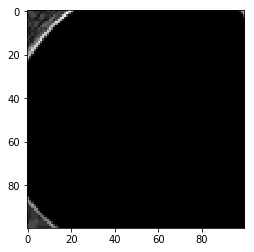

In [75]:
# Custom implementation


edges = cv2.Canny(gray,30,50)
[ximg,yimg] = np.nonzero(edges)
edgePts = np.vstack([ximg,yimg]).T

# print(edgePts)
xMax = gray.shape[0]
yMax = gray.shape[0]
rMax = int(math.sqrt((xMax)**2 + (yMax)**2)) 

# print(rMax)
acc = np.zeros((xMax,yMax,rMax), dtype = int)

# print(acc[0,0,0])

# acc[0,0,0] = 1

print(acc.shape)

for i in edgePts:
    for a in range(xMax):
        for b in range(yMax):
            r = int(math.sqrt((i[0] - a)**2 + (i[1] - b)**2))
            acc[a,b,r] += 1
            
# print(acc[:,:,50])
plt.imshow(acc[:,:,100], cmap='gray')
plt.show()
